In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate

## Режимные параметры

In [3]:
Pc = 0.921*1e6
print('Давление на входе в теплообменник Па:', Pc)

Давление на входе в теплообменник Па: 921000.0


In [4]:
Gg = 45663/3600/2
print('Расход газовой смеси кг/с:', Gg)

Расход газовой смеси кг/с: 6.342083333333333


In [5]:
Goil = 116756/3600/2
print('Расход газовой нефтепродуктов кг/с:', Goil)

Расход газовой нефтепродуктов кг/с: 16.21611111111111


## Свойства материалов

In [6]:
visc = 0.0002903
print('Вязкость нефтепродуктов', visc)
roil = 685
print('Плотность нефтепродуктов', roil)
sigma = 0.01612
print('Коэффициент поверхностного натяжения нефтепродуктов', sigma)
rH2 = 6.85                                                                    # тут интересно что по уравнению Менделеева-Клайперона не выходит, в ТЗ 3.3743 !!!
print('Плотность H2', rH2)
viscH2 = 1.398e-05
print('Вязкость H2', viscH2)

Вязкость нефтепродуктов 0.0002903
Плотность нефтепродуктов 685
Коэффициент поверхностного натяжения нефтепродуктов 0.01612
Плотность H2 6.85
Вязкость H2 1.398e-05


## Геометрия и скорости потока

Геометрия канала для подвода нефтепродуктов (сечения)

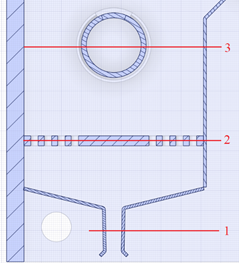

In [7]:
doil = 0.005          # диаметр отверстия
ioil = 98*2+97        # кол-во отверстий
Soil = (np.pi*doil**2)/4*ioil
print('Площадь проходного сечения суммарного', Soil)

Площадь проходного сечения суммарного 0.005753041546886308


In [8]:
S1gas = 1.5*0.03
print('Первое сечение канала подвода H2', S1gas)
dgas = 0.015                    # диаметр отверстия
igas = 55*8                     # кол-во отверстий
S2gas = (np.pi*dgas**2)/4*igas
print('Второе сечение канала подвода H2', S2gas)
S3gas = 1.5*(0.36-0.13)
print('Третье сечение канала подвода H2', S3gas)

Первое сечение канала подвода H2 0.045
Второе сечение канала подвода H2 0.07775441817634737
Третье сечение канала подвода H2 0.345


In [9]:
VFgas = Gg/rH2
VFoil = Goil/roil
print('Объемный расход H2', VFgas)
print('Объемный расход нефтепродуктов', VFoil)

Объемный расход H2 0.9258515815085159
Объемный расход нефтепродуктов 0.02367315490673155


In [10]:
Vel_gas1 = VFgas/S1gas
Vel_gas2 = VFgas/S2gas
Vel_gas3 = VFgas/S3gas
print ('Расходная скорость газа в сечении 1', Vel_gas1)
print ('Расходная скорость газа в сечении 2', Vel_gas2)
print ('Расходная скорость газа в сечении 3', Vel_gas3)

Расходная скорость газа в сечении 1 20.57447958907813
Расходная скорость газа в сечении 2 11.907382284163972
Расходная скорость газа в сечении 3 2.683627772488452


## Коэффициент расхода и среднерасходная скорость в канале

In [11]:
# Длина канала
lc = 0.01 
# Относительная длина канала (характерные значения 3<<6)
lrel=lc/doil
print('Относительная длина канала:', lrel)

Относительная длина канала: 2.0


**Число Рейнольдса**

In [12]:
Cd = 0.75        # сначала примем, потом пересчитаем

In [13]:
Vel_oil = VFoil/Soil/Cd

In [14]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 64730.789821947714


According to Nakayama коэффициент расхода:

In [15]:
Cd = 0.868-0.0425*np.sqrt(lc/doil)
print('Коэффициент расхода по Nakayama', Cd)

Коэффициент расхода по Nakayama 0.8078959235991434


In [16]:
Vel_oil = VFoil/Soil/Cd
print ('Расходная скорость для нефтепродуктов', Vel_oil)

Расходная скорость для нефтепродуктов 5.09334638894204


**Пересчет Числа Рейнольдса**

In [17]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 60092.013028337875


**Потери давления на впрыске**

In [18]:
dP = roil*(Vel_oil**2)/2
print('Потери давления на впрыске Па,', dP)

Потери давления на впрыске Па, 8885.195772429004


**Давление в коллекторе**

In [19]:
Ptube = Pc + dP
print('Давление в коллекторе,', Ptube)

Давление в коллекторе, 929885.195772429


## Распад капель

In [20]:
G1oil = Goil/ioil
print('Массовый расход нефтепродуктов, на один канал', G1oil)

Массовый расход нефтепродуктов, на один канал 0.05534508911642017


**Минимальная скорость истечения из канала для распады струи**

In [21]:
Ukr = np.sqrt(8*sigma/doil/roil) 
print('Критическая скорость истечения для распада струи', Ukr)

Критическая скорость истечения для распада струи 0.19404266217645424


**Число Вебера**

In [22]:
We_l = Vel_oil*Vel_oil*doil*roil/sigma
We_g = Vel_oil*Vel_oil*doil*rH2/sigma
print('Число Вебера по топливу', We_l)
print('Число Вебера по H2', We_g)

Число Вебера по топливу 5511.908047412534
Число Вебера по H2 55.11908047412534


**Число Онезорге**

In [23]:
Oh = visc/np.sqrt(roil*sigma*doil)
print('Число Онезорге', Oh)

Число Онезорге 0.0012354757605884954


**Режимы распада по критериальным числам**

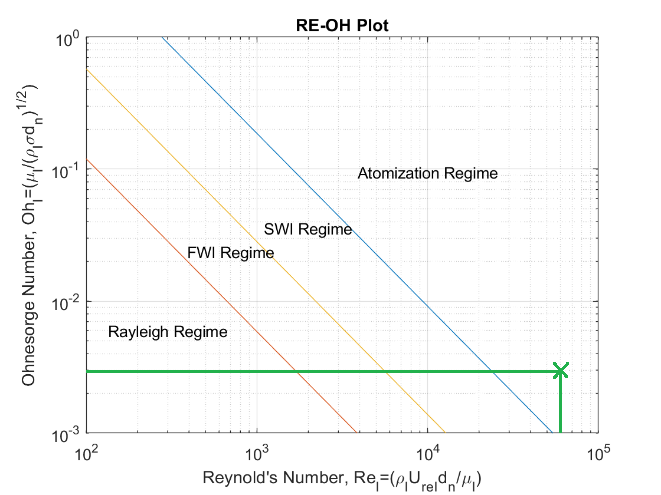

**Вывод:** Atomization

**Диаметр капли нефтепродуктов** (by Harmon [10]) - странная формула на нее битые ссылки и написано, что для разным режимов в разных книгах

In [24]:
ddrop = 330*pow(doil, 0.3)* pow(visc, 0.07)* pow(roil, -0.648)*pow(sigma, -0.15)*pow(Vel_oil, -0.55)*pow(viscH2, 0.78)*pow(rH2, -0.052)
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 6.210976767089629e-05


**Диаметр капли нефтепродуктов** (Лышевский)

In [25]:
ddrop = 1.44*doil*pow(Oh, 0.1466)*pow(We_l*rH2/roil, -0.266)
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.0009285580770445745


**Диаметр капли нефтепродуктов** (Tanasawa and Toyoda [13])

In [26]:
ddrop = 47*doil/Vel_oil*pow(sigma/rH2, 0.25)*(1+331*visc/np.sqrt(roil*sigma*doil))
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.014317807807709209


**Диаметр капли нефтепродуктов** (Elkotb [15]])

In [27]:
ddrop = 6156*pow(visc/roil, 0.385)*pow(sigma*roil, 0.737)*pow(rH2, 0.06)*pow(dP/101234, -0.54)/1e6
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.000531157528958173


**Полученные в ANSYS в расчетной области**

In [28]:
ddrop_ansys = 9.082314e-04
print('Характерный диаметр капель полученный в ANSYS', ddrop_ansys)

Характерный диаметр капель полученный в ANSYS 0.0009082314


## Расчет критического диаметра капли с подхватом потока рабочего газа

Скорость потока газа:

In [30]:
S4gas = 0.36*1.5
ro_tz = 3.3743
Ugas = Gg/ro_tz/S4gas
Ugas

3.480603018531873

Начальная скорость капли:

In [32]:
Ud0 = Vel_oil
Ud0

5.09334638894204

Решаем ОДУ относительно скорости капли:

$$\frac{dU}{dt} = -g -  \frac1 2  \frac{\rho A} m (Ugas-U)^2 Cd$$
$$Cd = \frac {24} {Re} + \frac 4 {\sqrt(Re)} + 0.4 $$


In [95]:
ddrop = doil         # критический случай диаметр капли равен диаметру отверстия 

In [96]:
mdrop = np.pi*(ddrop**3)/4*roil
print('Масса капли', mdrop)
Adrop = np.pi*(ddrop**2)/4
print('Миделево сечение капли', Adrop)

Масса капли 6.724971774090652e-05
Миделево сечение капли 1.9634954084936207e-05


RHS:

In [167]:
def dudt(t, U):
    g = 9.81
    Red =  abs((Ugas - U)*ddrop*ro_tz/viscH2)
    Cd  = 24/Red + 4/np.sqrt(Red) + 0.4
    rhs = -g + 0.5*(ro_tz*Adrop)/mdrop*abs((Ugas - U)**3)/(Ugas - U)*Cd
    return rhs

Оценка времени прибывания капли в смесительной каме

In [178]:
Lchamb = 0.2  
print('Расстояние до входа в теплообменник, м: ', Lchamb)
t = np.linspace(0, 1*Lchamb/Ugas, 100)

Расстояние до входа в теплообменник, м:  0.2


Решение уравнения:

In [179]:
Udrop = odeint(dudt, y0=Ud0, t=t, tfirst=True)

Скорость капли в потоке газа по времени:

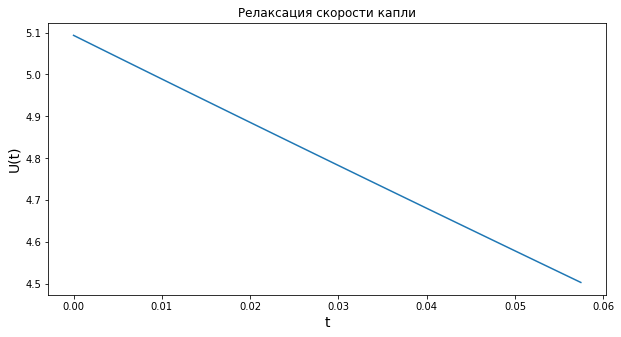

In [180]:
plt.figure(figsize=(10,5))
plt.title ('Релаксация скорости капли')
plt.plot(t, Udrop)
plt.ylabel('U(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.show()

Координата положения капли относительно форсунки:

In [181]:
Xdrop = integrate.cumtrapz(Udrop.T, t, initial=0)

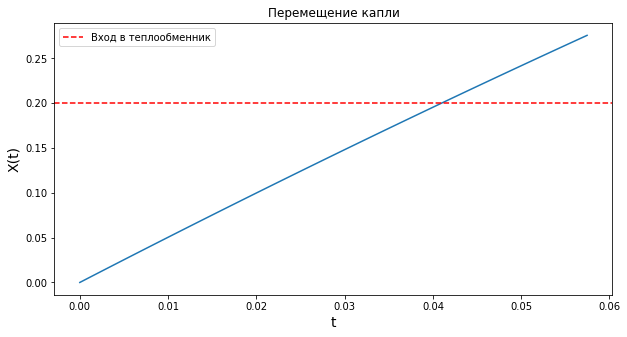

In [182]:
plt.figure(figsize=(10,5))
plt.title ('Перемещение капли')
plt.plot(t, Xdrop.T)
plt.axhline(y = Lchamb, color = 'r', linestyle='dashed', label = 'Вход в теплообменник')
plt.ylabel('X(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.legend()
plt.show()

**Выводы**
 - примерная среднерасходная скорость подачи нефтепродуктов составляет порядка 5.1 m/s;
 - среднерасходная скорость потока водорода составляется порядка 3.5 m/s;
 - параметры подачи нефтепродуктов, соответствуют режиму атомизации на капели струи, что является рациональным выбором;
 - значение средних Зауторовских диаметров капель, полученных по разным зависимостям достигают 1 мм, что несколько многовато. Стоит согласовать с возможных технологическим уровнем давления в магистрале нефтепродуктов;
 - начальной скорости нефтепродуктов и скорости потока газа достаточно, чтобы преодолеть действие силы тяжести и сопротивления среды и достичь поверхности теплообменного аппарата, для "предельного" случая диаметра капли равного диаметру подводящего отверстия;
 - до достижения поверхности теплообменного аппарата,  скорость капель остается выше скорости среды.   